# Analysis for the embeddings 

In [1]:
# Load the embeddings 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.manifold import TSNE

# Load the embeddings
trait_df = pd.read_csv('description_embedding_df.csv', index_col=0)
sample_df = pd.read_csv('sample_with_description.csv')


# Visualization of samples and traits

In [2]:
matrix = sample_df.embedding.apply(eval).to_list() + trait_df.embedding.apply(eval).to_list()

In [3]:
# Convert matrix to a NumPy array
matrix_np = np.array(matrix)

In [4]:
# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix_np)

In [5]:
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

In [6]:
# Add the t-SNE results to the data frame
sample_df['tsne_x_sample_trait'] = x[:len(sample_df)]
sample_df['tsne_y_sample_trait'] = y[:len(sample_df)]
trait_df['tsne_x_sample_trait'] = x[len(sample_df):]
trait_df['tsne_y_sample_trait'] = y[len(sample_df):]

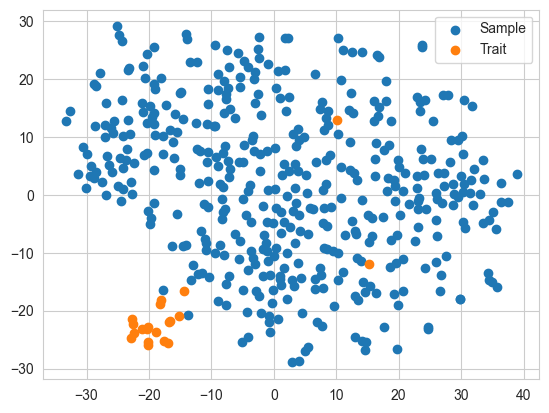

In [7]:
# Plot the t-SNE results
fig, ax = plt.subplots()
ax.scatter(sample_df.tsne_x_sample_trait, sample_df.tsne_y_sample_trait, label='Sample')
ax.scatter(trait_df.tsne_x_sample_trait, trait_df.tsne_y_sample_trait, label='Trait')
ax.legend()
plt.show()

# Visualization of Samples only 

In [8]:
matrix = sample_df.embedding.apply(eval).to_list() 
# Convert matrix to a NumPy array
matrix_np = np.array(matrix)

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix_np)

In [9]:
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

In [10]:
# Add the t-SNE results to the data frame
sample_df['tsne_x_sample'] = x
sample_df['tsne_y_sample'] = y

In [11]:
# preview sample_df
sample_df.head(6)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,you_should_message_me_if,merged_profile,cleaned_religion,seriousness_degree,belief,embedding,tsne_x_sample_trait,tsne_y_sample_trait,tsne_x_sample,tsne_y_sample
0,38,single,f,straight,a little extra,NaN,socially,NaN,graduated from college/university,white,...,you think you can make me laugh!,"i grew up mostly in the bay area, lived in san...",atheism,4.0,atheism,"[0.005271855276077986, -0.0013254006626084447,...",21.036892,3.814842,-17.120615,5.274164
1,27,single,f,bisexual,thin,anything,not at all,often,graduated from college/university,white,...,...you're open to being open! i've tried monog...,i'm currently working to build my petsitting ...,atheism,4.0,atheism,"[-0.031448844820261, -0.02344522811472416, -0....",6.341463,-2.395791,1.109929,7.845979
2,25,single,f,bisexual,thin,strictly vegetarian,socially,never,graduated from college/university,white,...,"you speak sarcasm, appreciate irony, but don't...","oh hey there, internet person. i hope you find...",atheism,4.0,atheism,"[-0.023152481764554977, -0.005695262923836708,...",13.353599,2.598843,-23.347282,2.087268
3,20,single,f,bisexual,average,mostly vegetarian,often,often,dropped out of two-year college,white,...,you enjoy a good fleshless sandwich. and/or yo...,"i am a french native, california transplant. w...",atheism,4.0,atheism,"[-0.010571823455393314, -0.035015273839235306,...",5.220971,3.370538,21.251408,4.430061
4,31,single,f,straight,used up,strictly vegetarian,socially,sometimes,graduated from law school,white,...,you like drinking fancy beers with girls who c...,"potty-mouthed and cat-obsessed, what more coul...",atheism,4.0,atheism,"[0.022974137216806412, -0.011390862055122852, ...",10.696959,4.831810,26.556738,2.366415
5,30,single,f,gay,thin,mostly vegetarian,socially,never,working on ph.d program,white,...,...if you're interested in meeting or chatting...,i'm a transplant to the sf area by way of chic...,atheism,4.0,atheism,"[-0.022436097264289856, -0.0016404064372181892...",-10.582347,2.453353,-0.965727,-6.966702


In [12]:
# preview trait_df
trait_df.head(6)

,description,embedding,tsne_x_sample_trait,tsne_y_sample_trait
profile,,,,
Housewife,"Hello! I'm a devoted homemaker, cherishing eve...","[-0.03389963507652283, -0.016256757080554962, ...",-18.202229,-18.842054
One-Night Stand Seeker,Hey! I'm all about seizing the day and embraci...,"[-0.010394031181931496, -0.0368705615401268, -...",-22.703741,-21.412209
DINK,Greetings! I'm deeply invested in my career an...,"[-0.0027837438974529505, -0.028377480804920197...",-20.322407,-23.178610
Materialistic,"Salutations! For me, life's greatest joys are ...","[-0.01546551939100027, -0.0214210394769907, -0...",-20.170799,-22.834774
Family-Oriented,Hello! Envisioning a home brimming with laught...,"[-0.03264802321791649, -0.007123137358576059, ...",-18.101542,-18.236946
Virgin,Hi! Stepping into the dating scene with eyes w...,"[-0.0043340642005205154, -0.011229992844164371...",-14.383381,-16.589975


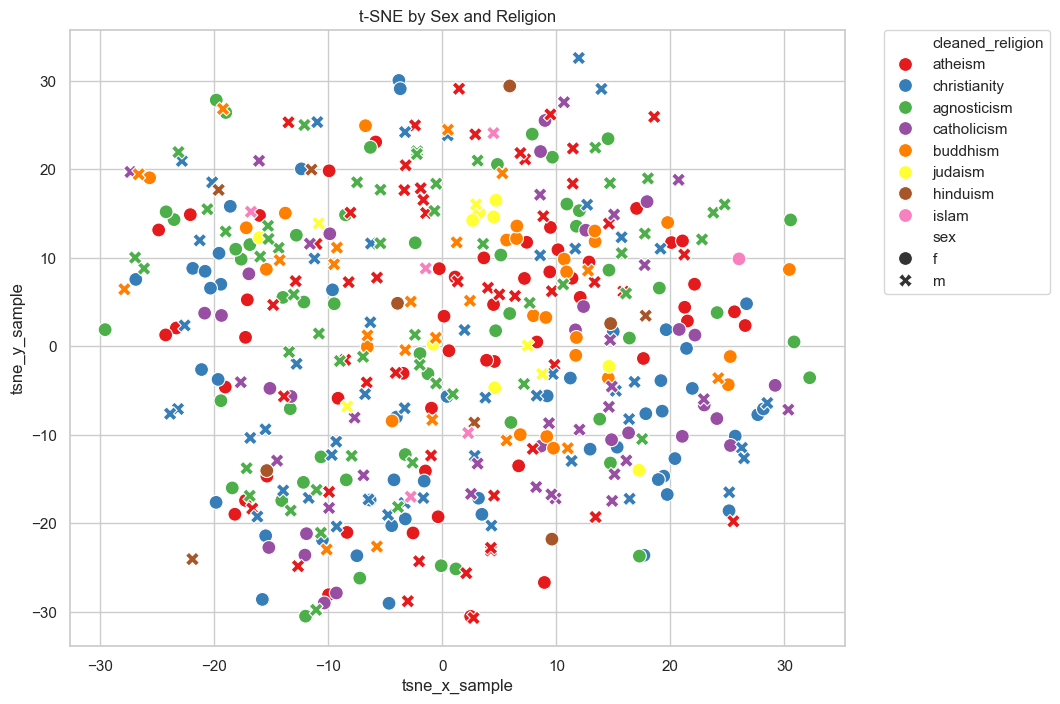

In [13]:
# Plot the t-SNE results
import seaborn as sns

# Check if the specified columns are present in the dataframe
required_columns = ['tsne_x_sample', 'tsne_y_sample', 'sex', 'cleaned_religion']
missing_columns = [col for col in required_columns if col not in sample_df.columns]

# If no columns are missing, proceed with plotting
if not missing_columns:
    # Set the style of the plot
    sns.set(style="whitegrid")

    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(x='tsne_x_sample', y='tsne_y_sample', 
                              style='sex', hue='cleaned_religion', 
                              data=sample_df, palette='Set1', s=100)

    # Add a legend and title
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('t-SNE by Sex and Religion')

    # Show the plot
    plt.show()
else:
    missing_columns

# Compare cosince similarity between samples and traits

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between the samples and traits
sample_trait_similarity = cosine_similarity(sample_df.embedding.apply(eval).to_list(), trait_df.embedding.apply(eval).to_list())

In [15]:
sample_trait_similarity.shape

(432, 20)

In [16]:
# create a dataframe for sample_trait_similarity where the index is the sample_id and the columns are the trait_id
sample_trait_similarity_df = pd.DataFrame(sample_trait_similarity, index=sample_df.index, columns=trait_df.index)

# Display the first few rows of the data frame
sample_trait_similarity_df

profile,Housewife,One-Night Stand Seeker,DINK,Materialistic,Family-Oriented,Virgin,Super Religious,Adventure Seeker,Tech Geek,Eco-Conscious Individual,Fitness Fanatic,Artist,Pet Lover,Culinary Enthusiast,Finance Bro,Startup CEO,Party Animal,Adult Entertainment Professional,Vegan,James Evans
0,0.128887,0.174488,0.136347,0.159818,0.186390,0.141139,0.127126,0.173079,0.133458,0.135414,0.160679,0.149023,0.155706,0.128490,0.171172,0.151760,0.185619,0.170652,0.112671,0.096576
1,0.324847,0.450028,0.470457,0.433773,0.323867,0.499335,0.339609,0.426564,0.402518,0.463816,0.398212,0.383350,0.498259,0.414691,0.399419,0.366901,0.457872,0.471464,0.463731,0.199878
2,0.260961,0.370903,0.405265,0.395823,0.235956,0.384468,0.275051,0.319900,0.355540,0.329351,0.294652,0.336766,0.298539,0.358907,0.339611,0.313439,0.366242,0.330433,0.286406,0.181174
3,0.263975,0.413970,0.359553,0.352283,0.241868,0.399010,0.279720,0.346104,0.314768,0.278483,0.304147,0.355836,0.303443,0.370641,0.330055,0.292507,0.345868,0.403364,0.314967,0.123482
4,0.254877,0.326687,0.356426,0.341831,0.241913,0.323583,0.306462,0.294315,0.301991,0.298913,0.276251,0.354848,0.285125,0.320833,0.307766,0.273782,0.386419,0.327146,0.264238,0.113138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.088959,0.149388,0.158225,0.151668,0.077779,0.116648,0.152771,0.143445,0.164209,0.107760,0.064820,0.122778,0.051327,0.115844,0.113661,0.164945,0.200534,0.146749,0.106347,0.161868
428,0.281008,0.310275,0.267695,0.268130,0.268019,0.268077,0.202971,0.265622,0.263682,0.271657,0.230823,0.290606,0.277669,0.278023,0.287512,0.240183,0.361735,0.292846,0.234062,0.156695
429,0.265937,0.416354,0.419031,0.410024,0.304828,0.418489,0.303989,0.348084,0.357158,0.343694,0.328890,0.356781,0.341769,0.413875,0.386928,0.317108,0.420526,0.347920,0.330022,0.131484
430,0.221971,0.339204,0.272465,0.255830,0.244636,0.350902,0.208504,0.272564,0.271144,0.261130,0.278705,0.276793,0.237293,0.260344,0.270276,0.230303,0.271056,0.312533,0.237134,0.142398


In [17]:
# concatenate the sample_df and sample_trait_similarity_df
sample_df = pd.concat([sample_df, sample_trait_similarity_df], axis=1)

# Display the first few rows of the data frame
sample_df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,Fitness Fanatic,Artist,Pet Lover,Culinary Enthusiast,Finance Bro,Startup CEO,Party Animal,Adult Entertainment Professional,Vegan,James Evans
0,38,single,f,straight,a little extra,NaN,socially,NaN,graduated from college/university,white,...,0.160679,0.149023,0.155706,0.128490,0.171172,0.151760,0.185619,0.170652,0.112671,0.096576
1,27,single,f,bisexual,thin,anything,not at all,often,graduated from college/university,white,...,0.398212,0.383350,0.498259,0.414691,0.399419,0.366901,0.457872,0.471464,0.463731,0.199878
2,25,single,f,bisexual,thin,strictly vegetarian,socially,never,graduated from college/university,white,...,0.294652,0.336766,0.298539,0.358907,0.339611,0.313439,0.366242,0.330433,0.286406,0.181174
3,20,single,f,bisexual,average,mostly vegetarian,often,often,dropped out of two-year college,white,...,0.304147,0.355836,0.303443,0.370641,0.330055,0.292507,0.345868,0.403364,0.314967,0.123482
4,31,single,f,straight,used up,strictly vegetarian,socially,sometimes,graduated from law school,white,...,0.276251,0.354848,0.285125,0.320833,0.307766,0.273782,0.386419,0.327146,0.264238,0.113138


In [18]:
# create a sample_df for men and women 
sample_df_m = sample_df[sample_df['sex'] == 'm']
sample_df_f = sample_df[sample_df['sex'] == 'f']

# print the shape of the sample_df_m and sample_df_f
sample_df_m.shape, sample_df_f.shape

((214, 58), (218, 58))

In [19]:
# Split the data based on the 'sex' category
female_df = sample_df_f.groupby('cleaned_religion').apply(lambda x: x.iloc[:, -20:].mean())
male_df = sample_df_m.groupby('cleaned_religion').apply(lambda x: x.iloc[:, -20:].mean())

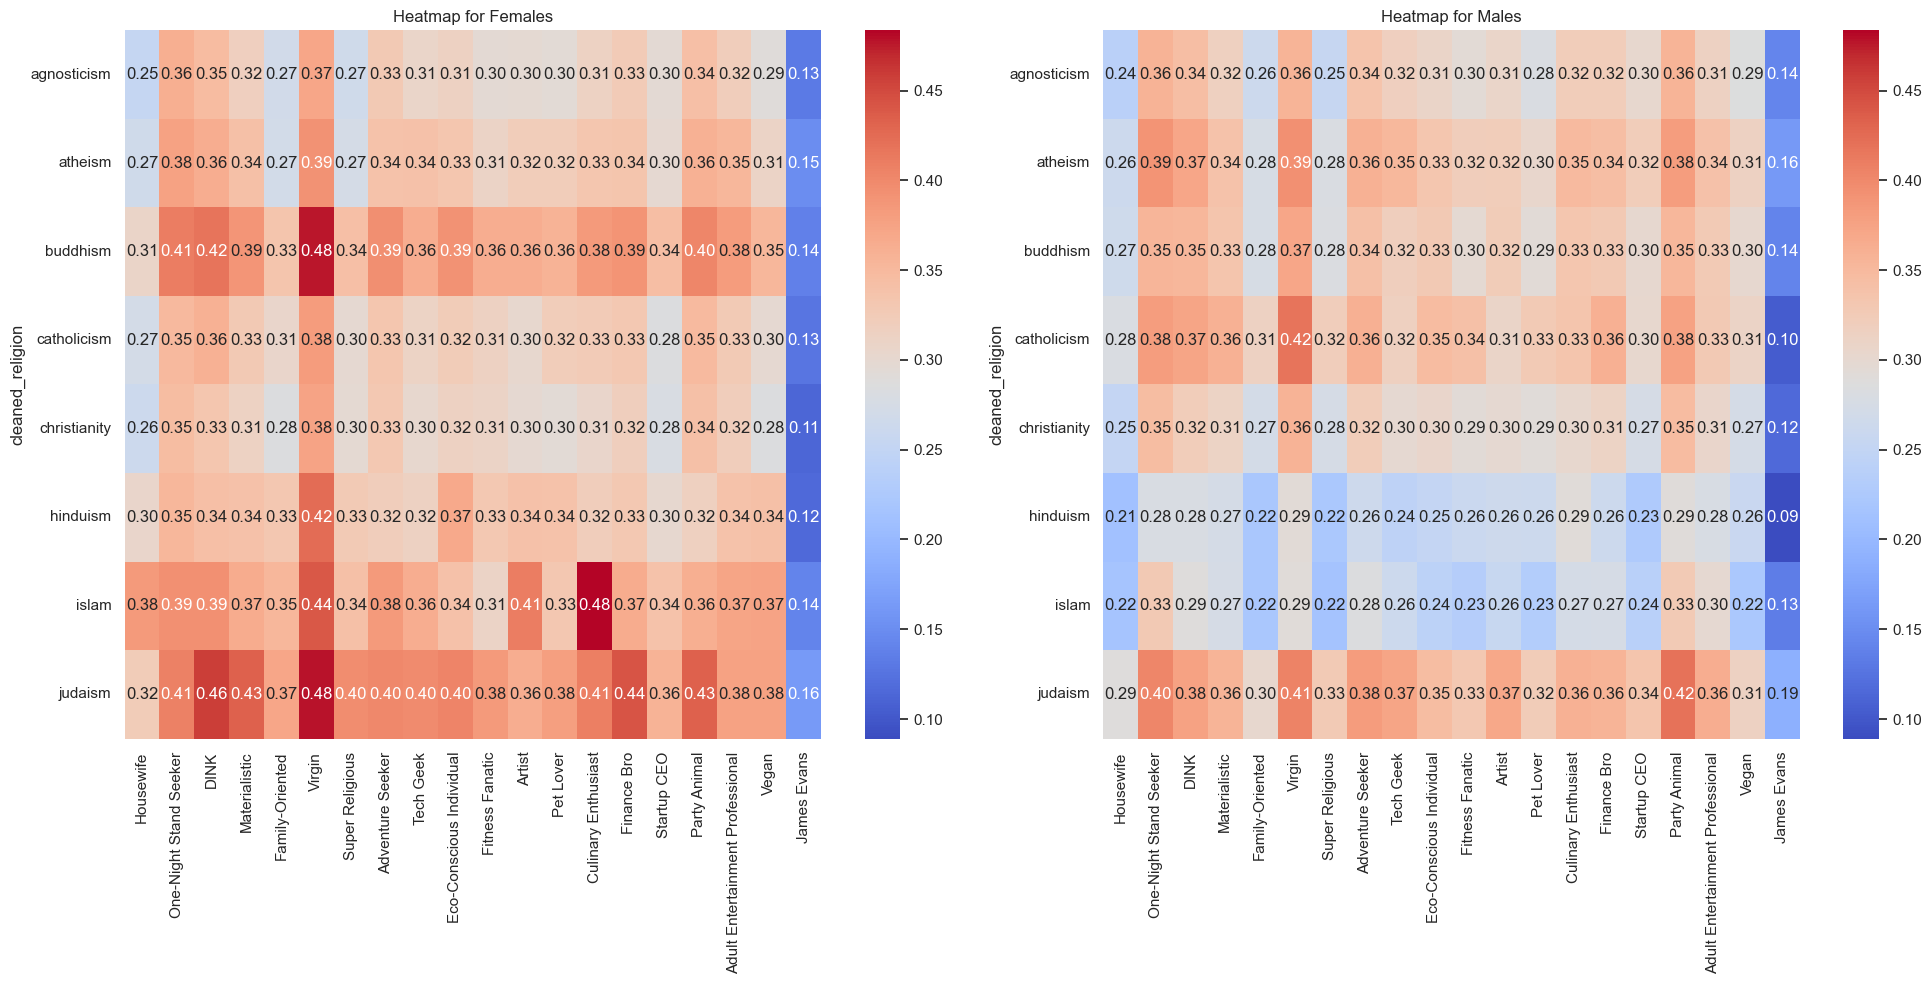

In [20]:
# Calculate the global minimum and maximum of the dataframes
vmin = min(female_df.min().min(), male_df.min().min())
vmax = max(female_df.max().max(), male_df.max().max())

# Create heatmaps for both subsets
plt.figure(figsize=(20, 10))

# Heatmap for 'f'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(female_df, cmap='coolwarm', annot=True, fmt=".2f", vmin=vmin, vmax=vmax)
plt.title('Heatmap for Females')
plt.yticks(rotation=0)  # rotate the y-axis labels for left plot

# Heatmap for 'm'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.heatmap(male_df, cmap='coolwarm', annot=True, fmt=".2f", vmin=vmin, vmax=vmax)
plt.title('Heatmap for Males')
plt.yticks(rotation=0)  # rotate the y-axis labels for right plot

plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()